In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plant-disease-dataset-withoutaugmentaion/Plant_leave_diseases_dataset_without_augmentation/Corn___Northern_Leaf_Blight/image (849).jpg
/kaggle/input/plant-disease-dataset-withoutaugmentaion/Plant_leave_diseases_dataset_without_augmentation/Corn___Northern_Leaf_Blight/image (276).JPG
/kaggle/input/plant-disease-dataset-withoutaugmentaion/Plant_leave_diseases_dataset_without_augmentation/Corn___Northern_Leaf_Blight/image (971).jpg
/kaggle/input/plant-disease-dataset-withoutaugmentaion/Plant_leave_diseases_dataset_without_augmentation/Corn___Northern_Leaf_Blight/image (864).JPG
/kaggle/input/plant-disease-dataset-withoutaugmentaion/Plant_leave_diseases_dataset_without_augmentation/Corn___Northern_Leaf_Blight/image (282).JPG
/kaggle/input/plant-disease-dataset-withoutaugmentaion/Plant_leave_diseases_dataset_without_augmentation/Corn___Northern_Leaf_Blight/image (566).JPG
/kaggle/input/plant-disease-dataset-withoutaugmentaion/Plant_leave_diseases_dataset_without_augmentation/C

### some standaerd importings

In [30]:
import os 
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### this note importings

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras 
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm # simple and elegant way to create progress bar 

## Load data 
this dataset have 55448 images in different unagumented subfolders which we will refer to as "classes", we got 39 class for different leaves; The classes are:
1.Apple_scab
2.Apple_black_rot
3.Apple_cedar_apple_rust
4.Apple_healthy
5.Background_without_leaves
6.Blueberry_healthy
7.Cherry_powdery_mildew
8.Cherry_healthy
9.Corn_gray_leaf_spot
10.Corn_common_rust
11.Corn_northern_leaf_blight
12.Corn_healthy
13.Grape_black_rot
14.Grape_black_measles
15.Grape_leaf_blight
16.Grape_healthy
17.Orange_haunglongbing
18.Peach_bacterial_spot
19.Peach_healthy
20.Pepper_bacterial_spot
21.Pepper_healthy
22.Potato_early_blight
23.Potato_healthy
24.Potato_late_blight
25.Raspberry_healthy
26.Soybean_healthy
27.Squash_powdery_mildew
28.Strawberry_healthy
29.Strawberry_leaf_scorch
30.Tomato_bacterial_spot
31.Tomato_early_blight
32.Tomato_healthy
33.Tomato_late_blight
34.Tomato_leaf_mold
35.Tomato_septoria_leaf_spot
36.Tomato_spider_mites_two-spotted_spider_mite
37.Tomato_target_spot
38.Tomato_mosaic_v
irus
39.Tomato_yellow_leaf_curl_virbased approach which is easier when further using in the notebook loading data by dataframe based approach which easier further when splitting 

In [7]:
def data(dataset_path):
    images = []
    labels = []
    for subfolder in tqdm(os.listdir(dataset_path)): # loops on the folder that is containing my subfolders 
        subfolder_path = os.path.join(dataset_path, subfolder)
        for image_filename in os.listdir(subfolder_path): # loops in the subfolders on the images inside each of the subfolders
            image_path = os.path.join(subfolder_path, image_filename)
            images.append(image_path)
            labels.append(subfolder)
    df = pd.DataFrame({'image': images, 'label': labels})
    return df
    

In [8]:
df = data('/kaggle/input/plant-disease-dataset-withoutaugmentaion/Plant_leave_diseases_dataset_without_augmentation')

100%|██████████| 39/39 [00:00<00:00, 411.18it/s]


In [9]:
df.shape

(55448, 2)

In [11]:
df.label.value_counts().to_frame()

count
label                                               
Orange___Haunglongbing_(Citrus_greening)        5507
Tomato___Tomato_Yellow_Leaf_Curl_Virus          5357
Soybean___healthy                               5090
Peach___Bacterial_spot                          2297
Tomato___Bacterial_spot                         2127
Tomato___Late_blight                            1909
Squash___Powdery_mildew                         1835
Tomato___Septoria_leaf_spot                     1771
Tomato___Spider_mites Two-spotted_spider_mite   1676
Apple___healthy                                 1645
Tomato___healthy                                1591
Blueberry___healthy                             1502
Pepper,_bell___healthy                          1478
Tomato___Target_Spot                            1404
Grape___Esca_(Black_Measles)                    1383
Corn___Common_rust                              1192
Grape___Black_rot                               1180
Corn___healthy                                  1162
Background_without_leaves                       1143
Strawberry___Leaf_scorch                        1109
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)      1076
Cherry___Powdery_mildew                         1052
Tomato___Early_blight                           1000
Potato___Early_blight                           1000
Potato___Late_blight                            1000
Pepper,_bell___Bacterial_spot                    997
Corn___Northern_Leaf_Blight                      985
Tomato___Leaf_Mold                               952
Cherry___healthy                                 854
Apple___Apple_scab                               630
Apple___Black_rot                                621
Corn___Cercospora_leaf_spot Gray_leaf_spot       513
Strawberry___healthy                             456
Grape___healthy                                  423
Tomato___Tomato_mosaic_virus                     373
Raspberry___healthy                              371
Peach___healthy                                  360
Apple___Cedar_apple_rust                         275
Potato___healthy                                 152

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(50,80))
for n,i in enumerate(np.random.randint(0,len(df),50)):
    plt.subplot(10,5,n+1)
    img = cv2.imread(df.image[i])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    text = f'{df.label[i]}\n'
    plt.title(text,color= 'red',fontsize=25)

In [16]:
X_train, X_test1, y_train, y_test1 = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42,shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test1,y_test1, test_size=0.5, random_state=42,shuffle=True)
df_train = pd.DataFrame({'image': X_train, 'label': y_train})
df_test = pd.DataFrame({'image': X_test, 'label': y_test})
df_val = pd.DataFrame({'image': X_val, 'label': y_val})

In [18]:
image_size = (224, 224)
batch_size = 32
datagen = ImageDataGenerator(
    rescale=1./255
)
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    shuffle=True
)
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False
)
val_generator = datagen.flow_from_dataframe(
    df_val,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False
)

Found 44358 validated image filenames belonging to 39 classes.
Found 5545 validated image filenames belonging to 39 classes.
Found 5545 validated image filenames belonging to 39 classes.


In [19]:
class_ = test_generator.class_indices.keys()
class_ = list(class_)

In [21]:
base_model = tf.keras.applications.xception.Xception(weights= 'imagenet' ,include_top = False , input_shape = (224,224,3) ,
                                                     pooling = 'max' )
model = keras.models.Sequential([
    base_model,
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256,activation = 'relu'),
    keras.layers.Dropout(.5),
    keras.layers.Dense(39 , activation= 'softmax' )
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ ?                      │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 20,806,952 (79.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [22]:
checkpoint_cb =ModelCheckpoint("my_keras_model.keras", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=5, restore_best_weights=True)
model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['accuracy',keras.metrics.AUC()])
hist=model.fit(train_generator,epochs=5,validation_data=val_generator,callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1734171228.062706     275 service.cc:145] XLA service 0x78c514002380 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734171228.062769     275 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1734171254.594160     275 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 556/1387 ━━━━━━━━━━━━━━━━━━━━ 6:40 482ms/step - accuracy: 0.6509 - auc: 0.9324 - loss: 1.5323

I0000 00:00:1734171522.154608     275 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion', 488 bytes spill stores, 488 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_1', 16 bytes spill stores, 16 bytes spill loads



1387/1387 ━━━━━━━━━━━━━━━━━━━━ 730s 490ms/step - accuracy: 0.7471 - auc: 0.9587 - loss: 1.0845 - val_accuracy: 0.9342 - val_auc: 0.9957 - val_loss: 0.2381
Epoch 2/5
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 496s 356ms/step - accuracy: 0.9181 - auc: 0.9927 - loss: 0.3207 - val_accuracy: 0.9014 - val_auc: 0.9880 - val_loss: 0.4162
Epoch 3/5
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 494s 354ms/step - accuracy: 0.9396 - auc: 0.9954 - loss: 0.2284 - val_accuracy: 0.9482 - val_auc: 0.9980 - val_loss: 0.1635
Epoch 4/5
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 496s 356ms/step - accuracy: 0.9514 - auc: 0.9963 - loss: 0.1790 - val_accuracy: 0.9499 - val_auc: 0.9956 - val_loss: 0.1796
Epoch 5/5
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 497s 357ms/step - accuracy: 0.9530 - auc: 0.9961 - loss: 0.1785 - val_accuracy: 0.9407 - val_auc: 0.9953 - val_loss: 0.2115


In [23]:
hist_=pd.DataFrame(hist.history)
hist_

accuracy       auc      loss  val_accuracy   val_auc  val_loss
0  0.841900  0.981581  0.649942      0.934175  0.995705  0.238134
1  0.922832  0.993199  0.300329      0.901353  0.987954  0.416212
2  0.942310  0.995688  0.216766      0.948242  0.997973  0.163536
3  0.949006  0.995830  0.197217      0.949865  0.995643  0.179633
4  0.953740  0.995925  0.182612      0.940667  0.995251  0.211517

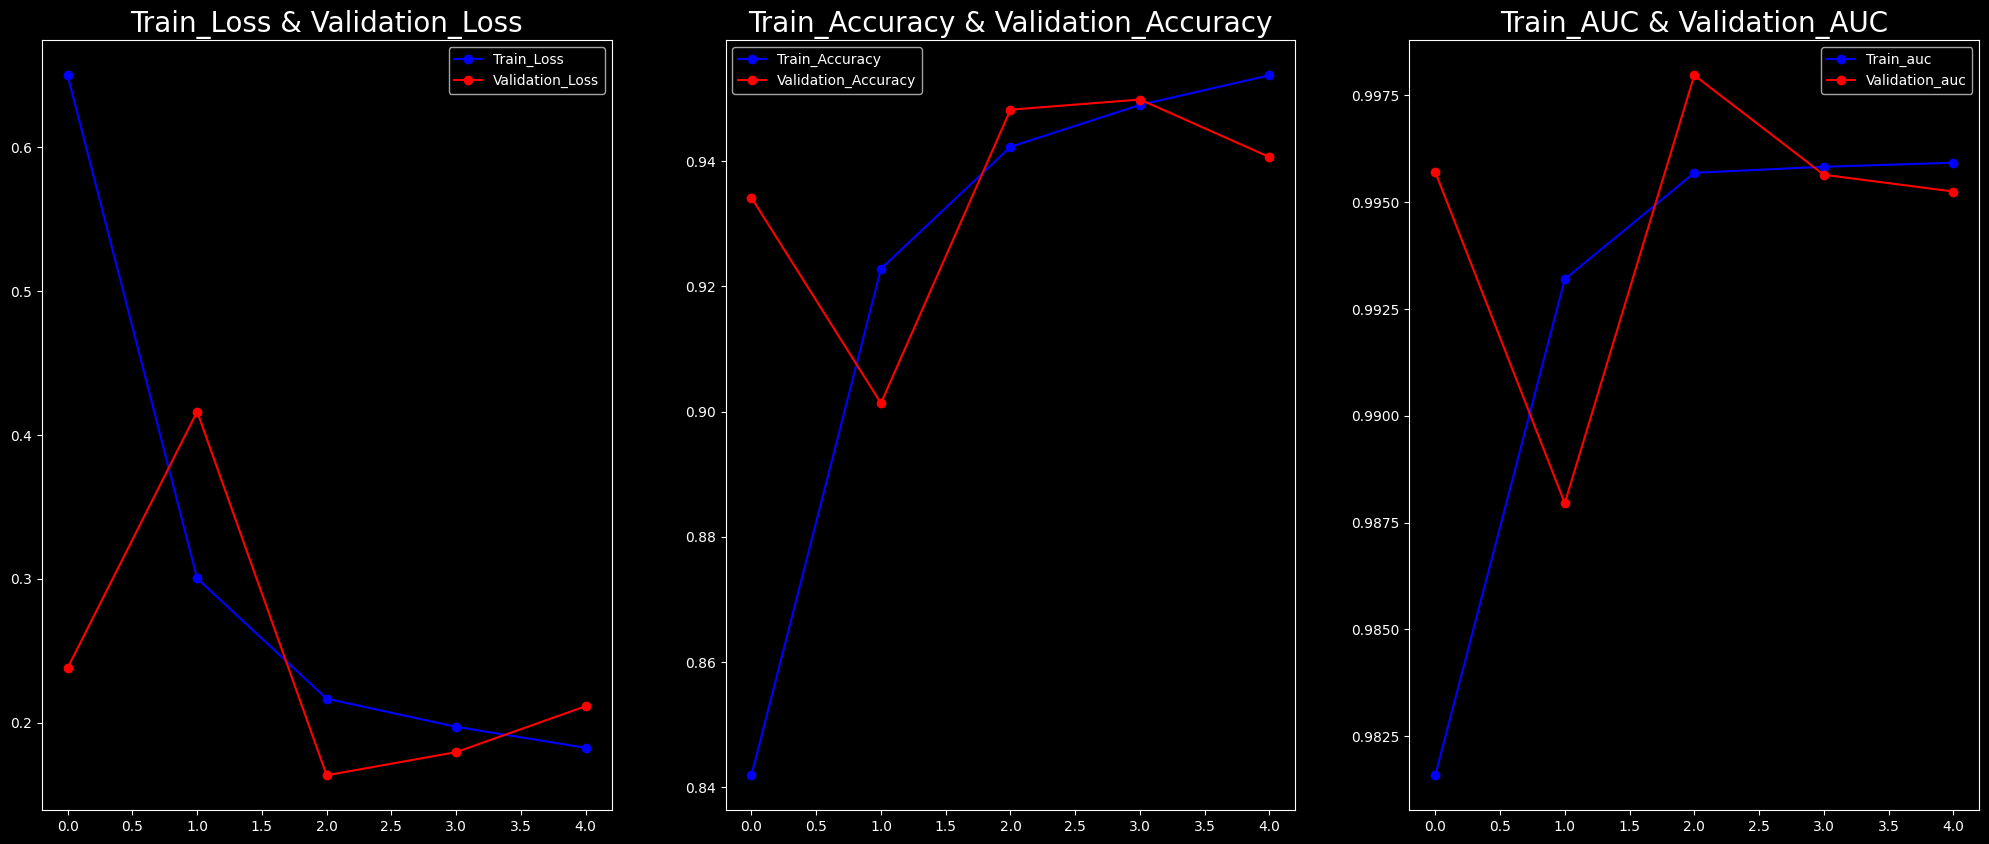

In [24]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
plt.plot(hist_['loss'],'b-o',label='Train_Loss')
plt.plot(hist_['val_loss'],'r-o',label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,3,2)
plt.plot(hist_['accuracy'],'b-o',label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],'r-o',label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()
plt.subplot(1,3,3)
plt.plot(hist_.iloc[:,1],'b-o',label='Train_auc')
plt.plot(hist_.iloc[:,4],'r-o',label='Validation_auc')
plt.title('Train_AUC & Validation_AUC',fontsize=20)
plt.legend()
plt.show()

In [25]:
score, acc,auc = model.evaluate(test_generator)
print('Test Loss =', score)
print('Test Accuracy =', acc)
print('Test AUC =', auc)

  1/174 ━━━━━━━━━━━━━━━━━━━━ 30s 174ms/step - accuracy: 0.9062 - auc: 0.9997 - loss: 0.2094

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


174/174 ━━━━━━━━━━━━━━━━━━━━ 38s 216ms/step - accuracy: 0.9472 - auc: 0.9965 - loss: 0.1900
Test Loss = 0.18910886347293854
Test Accuracy = 0.9464382529258728
Test AUC = 0.9962666630744934


In [26]:
# Get true labels
y_test = test_generator.classes
# Predict probabilities for each class
predictions = model.predict(test_generator)
# Convert predicted probabilities to class labels (choose the class with the highest probability)
y_pred = np.argmax(predictions, axis=1)
# Flatten both arrays just in case
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)
# Create a DataFrame to compare actual vs predicted labels
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
# Display the DataFrame
df.head()  # Show the first few rows of the comparison

174/174 ━━━━━━━━━━━━━━━━━━━━ 15s 75ms/step


Actual  Prediction
0      24          24
1      25          25
2       1           1
3      17          17
4      25          25

In [ ]:
batch = next(test_generator)
images= batch[0]
plt.figure(figsize=(50,80))
for n in range(32):
    plt.subplot(8,4,n+1)
    plt.imshow(images[n])
    plt.axis('off')
    text = f'Actual : {class_[int(y_test[n])]}\npred : {class_[int(y_pred[n])]}\n'
    plt.title(text,color= 'red',fontsize=25)

array([[ 58,   0,   0, ...,   0,   0,   0],
       [  0,  54,   0, ...,   0,   0,   0],
       [  0,   0,  32, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 533,   0,   0],
       [  0,   0,   0, ...,   0,  34,   0],
       [  0,   0,   0, ...,   0,   0, 177]])

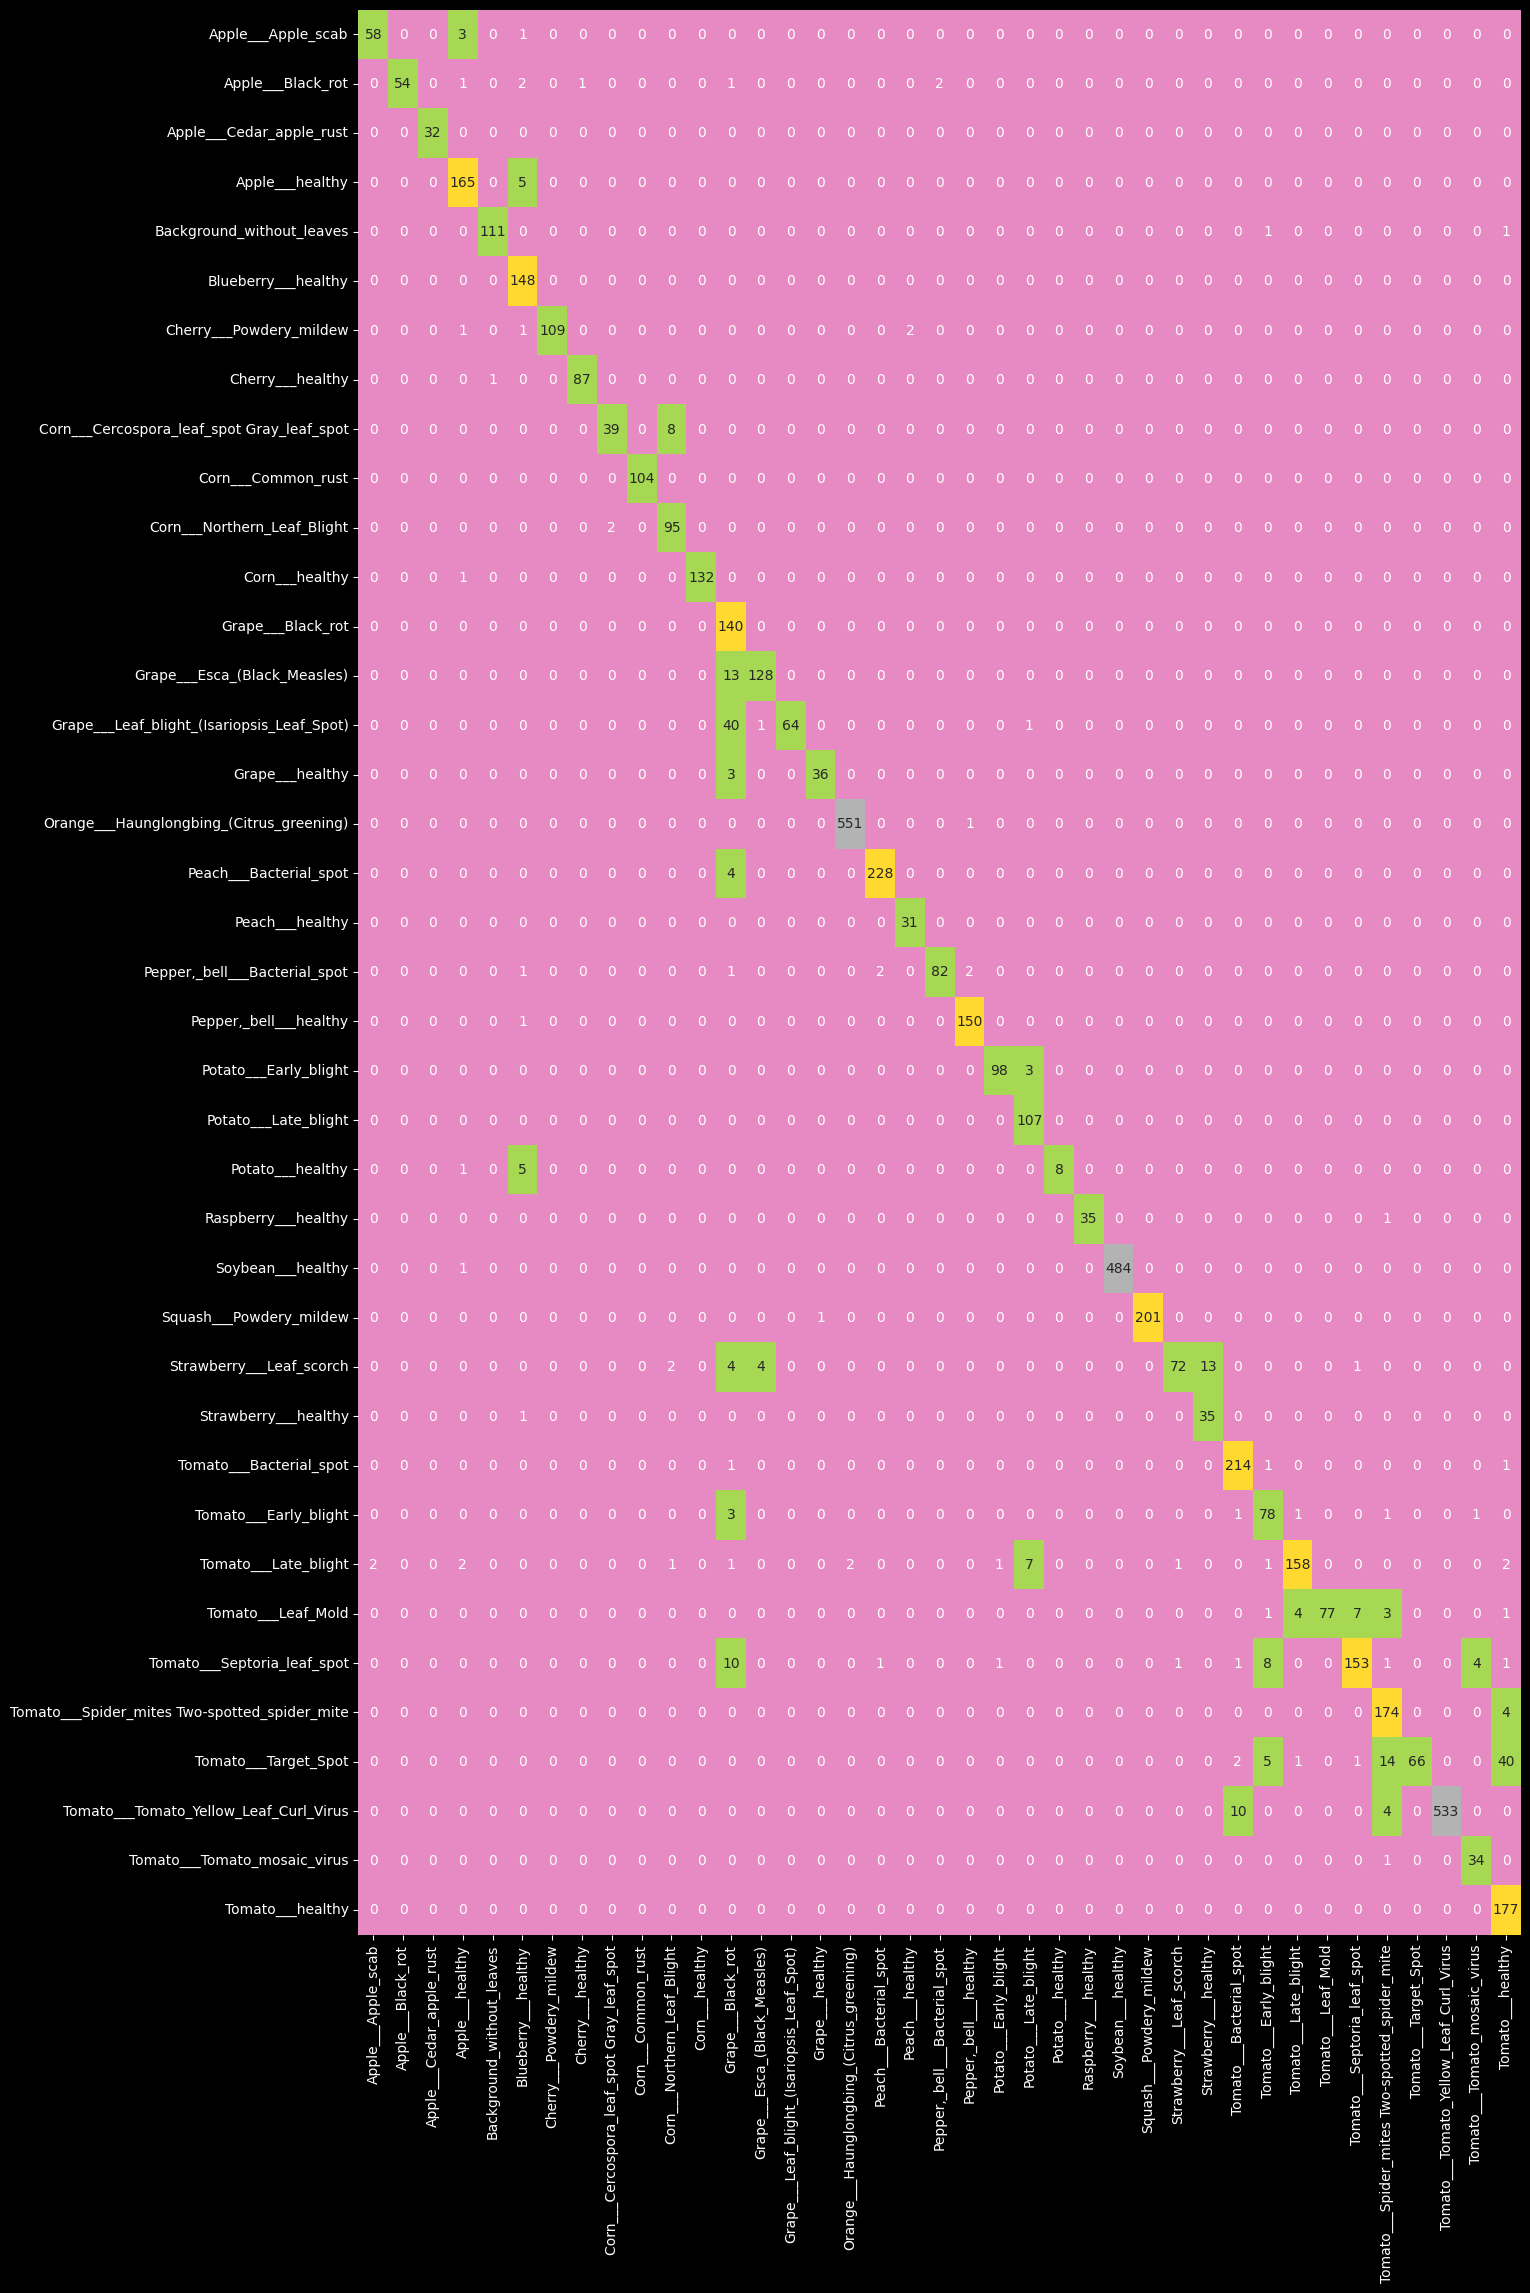

In [28]:
CM = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(15,25))
sns.heatmap(CM,fmt='g',center = True,cbar=False,annot=True,cmap='Set2',xticklabels=class_,yticklabels=class_)
CM

In [29]:
ClassificationReport = classification_report(y_test,y_pred,target_names=class_)
print('Classification Report is : ', ClassificationReport)

Classification Report is :                                                 precision    recall  f1-score   support

                           Apple___Apple_scab       0.97      0.94      0.95        62
                            Apple___Black_rot       1.00      0.89      0.94        61
                     Apple___Cedar_apple_rust       1.00      1.00      1.00        32
                              Apple___healthy       0.94      0.97      0.96       170
                    Background_without_leaves       0.99      0.98      0.99       113
                          Blueberry___healthy       0.90      1.00      0.95       148
                      Cherry___Powdery_mildew       1.00      0.96      0.98       113
                             Cherry___healthy       0.99      0.99      0.99        88
   Corn___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.83      0.89        47
                           Corn___Common_rust       1.00      1.00      1.00       104
              